In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal

%matplotlib inline

In [2]:
filepath = r'D:\measuring\data\20180202' 
folder = r'\103023_PSBcountsMsmt\103023_PSBcountsMsmt.dat'

data = np.genfromtxt(filepath + folder,
                     skip_header=9,
                     skip_footer=1,
                     names=True,
                     dtype=None,
                    delimiter = '')

counts = np.zeros(np.size(data))
time = np.zeros(np.size(data))
for i in range(0,np.size(data)):
    counts[i] = data[i][1]
    time[i] = data[i][0]


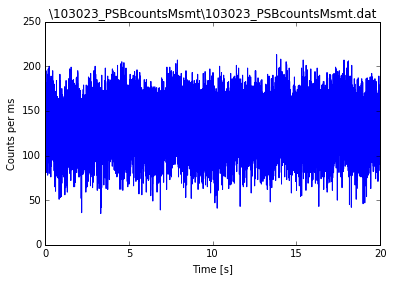

In [3]:
plt.figure()
plt.plot(time,counts)
plt.xlabel('Time [s]')
plt.ylabel('Counts per ms')
plt.title(folder)
plt.show()

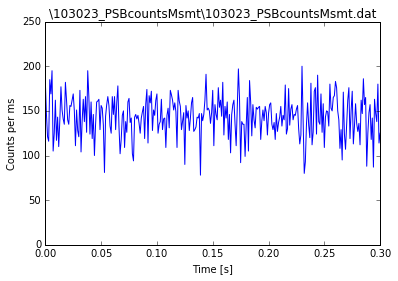

In [4]:
plt.figure()
plt.plot(time,counts)
plt.xlim(0,0.3)
plt.xlabel('Time [s]')
plt.ylabel('Counts per ms')
plt.title(folder)
plt.show()

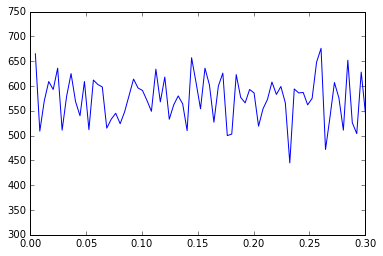

In [5]:
# binning the data

binsize = 4
nr_bins = np.round(np.size(counts)/binsize)

offset = np.size(counts)-binsize*nr_bins
counts_binned = np.sum(np.reshape(counts[offset:],(nr_bins,binsize)),axis=1)
time_binned = np.mean(np.reshape(time[offset:],(nr_bins,binsize)),axis=1)


plt.plot(time_binned,counts_binned)

plt.xlim(0,0.3)
plt.show()

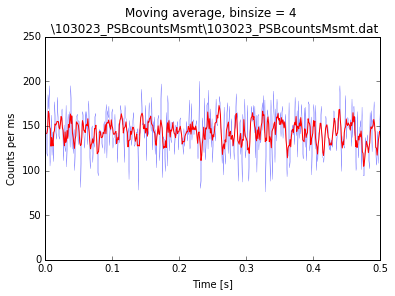

In [6]:
# moving average
N = 4
counts_a = np.convolve(counts, np.ones((N,))/N, mode='valid')
time_a = np.convolve(time, np.ones((N,))/N, mode='valid')

plt.plot(time,counts,'b', linewidth=0.2)
plt.plot(time_a,counts_a,'r')
plt.xlim(0,0.5)
plt.title('Moving average, binsize = %i \n %s' %(N,folder))
plt.xlabel('Time [s]')
plt.ylabel('Counts per ms')
plt.show()

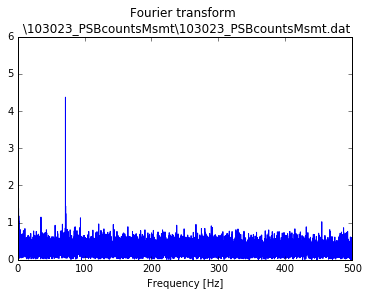

Amplitude DC signal: 136.331616581 Amplitude AC signal: 4.37065573896


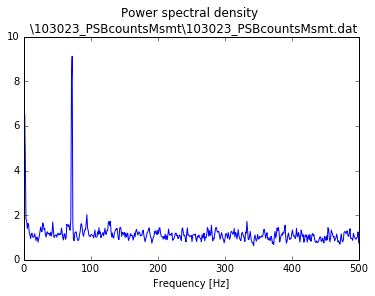

In [7]:
T = time[1]-time[0]

# Fourier transform
counts_f = scipy.fftpack.fft(counts)*2.0/len(counts)
counts_f = np.abs(counts_f[:len(counts_f)/2])
freq = np.linspace(0, 1.0/(2.0*T), np.size(counts_f))

plt.plot(freq,counts_f)
plt.title('Fourier transform \n %s' %folder)
plt.ylim(0,6)
# plt.xlim(60,80)
plt.xlabel('Frequency [Hz]')
plt.show()

print 'Amplitude DC signal:',np.mean(counts), 'Amplitude AC signal:', np.max(counts_f[1:])


# Power spectral density function
freq_pow, power = scipy.signal.welch(counts, axis = 0, fs = 1.0/T,nperseg = 1000)

plt.plot(freq_pow,power)
plt.title('Power spectral density \n %s' %folder)
# plt.xlim(60,80)
plt.xlabel('Frequency [Hz]')
plt.show()


In [287]:
scipy.signal.welch?

In [308]:
print 1.0/70*1000

14.2857142857


In [289]:
scipy.fftpack.fft?